In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
from collections import Counter

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PMF 2 4/STROJNO + MREŽE/Dataall_stargazers_for_recent_repos.csv')
print(df.head(10))

  repository_name      username    user_id
0       ore-miner      tommy-ca  140900186
1       ore-miner     Brucecarl    1773497
2       ore-miner          iczc   12002459
3       ore-miner      okeyzero   48344256
4       ore-miner  xiaoduzi1919    3840088
5       ore-miner  ConnorRepeat   41321054
6       ore-miner      lwsh123k   37106566
7       ore-miner       aa66609   13633514
8       ore-miner        meiwhu   15714433
9       ore-miner      xiomimin  108560806


#Network Analysis

In [ ]:
def create_user_graph(file_path):
    G = nx.MultiGraph()
    user_repos = {}

    with open(file_path, 'r') as file:
        csv_reader = csv.DictReader(file)

        for row in tqdm(csv_reader, desc="Processing rows"):
            repository = row['repository_name']
            user = row['username']

            # Add user as node
            if user not in G:
                G.add_node(user)

            # Add repo to user
            if user not in user_repos:
                user_repos[user] = set()
            user_repos[user].add(repository)

    users = list(user_repos.keys())

    with tqdm(total=len(users) * (len(users) - 1) // 2, desc="Creating edges") as pbar:
        for i in range(len(users)):
            for j in range(i + 1, len(users)):
                common_repos = user_repos[users[i]].intersection(user_repos[users[j]])
                if common_repos:
                    G.add_edge(users[i], users[j], repositories=",".join(list(common_repos)))
                pbar.update(1)

    return G

file_path = '/content/drive/MyDrive/PMF 2 4/STROJNO + MREŽE/Dataall_stargazers_for_recent_repos.csv'
user_graph = create_user_graph(file_path)

print("Number of nodes:", user_graph.number_of_nodes())
print("Number of edges:", user_graph.number_of_edges())

nx.write_graphml(user_graph, 'github_stargazers_graph.graphml', named_key_ids=True)

Processing rows: 4497it [00:00, 68593.05it/s]
Creating edges: 100%|██████████| 8219485/8219485 [00:13<00:00, 627949.05it/s] 


Number of nodes: 4055
Number of edges: 464139


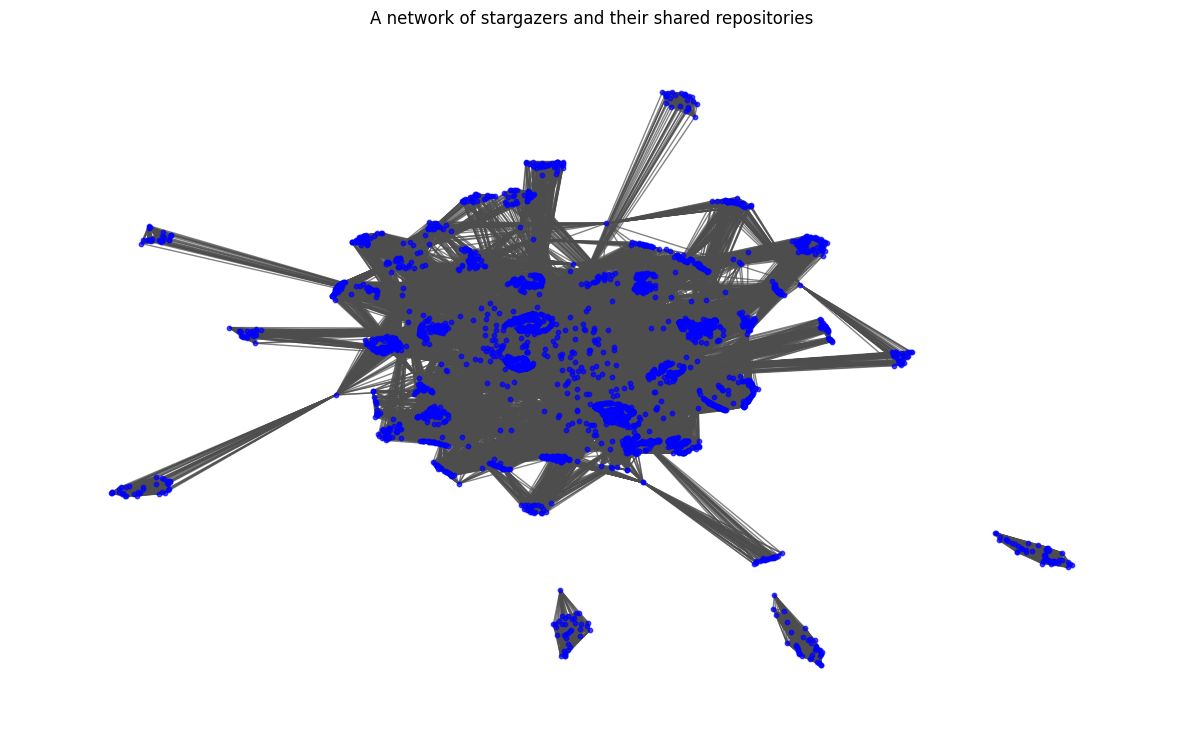

In [ ]:
user_graph = nx.read_graphml('github_stargazers_graph.graphml')

pos = nx.spring_layout(user_graph, iterations=15, seed=1721)
plot_options = {
    'node_size': 10,
    'with_labels': False,
    'node_color': 'blue',
    'edge_color': '#4d4d4d',
    'alpha': 0.7
}

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(user_graph, pos=pos, ax=ax, **plot_options)
plt.title('A network of stargazers and their shared repositories')
plt.show()

In [ ]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    user_graph
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[('IndieMinimalist', 0.09795767482270298),
 ('antogerva', 0.09574100429346141),
 ('Sandalots', 0.057764893921729794),
 ('orociic', 0.053645171380909164),
 ('appfromape', 0.04999287353726945),
 ('vgecko', 0.0376478644676185),
 ('kehoecj', 0.022829343323723317),
 ('tkersey', 0.01971285061860125),
 ('svercl', 0.01735301475713779),
 ('ctsrc', 0.015633507237782174)]

In [ ]:
top_betweenness_central_users = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]
print("Top stargazers by betweenness centrality:", top_betweenness_central_users)

Top stargazers by betweenness centrality: ['IndieMinimalist', 'antogerva', 'Sandalots', 'orociic', 'appfromape', 'vgecko', 'kehoecj', 'tkersey', 'svercl', 'ctsrc']


(-0.9938904541730882,
 1.0274655121564866,
 -1.195276482105255,
 1.0550525021553039)

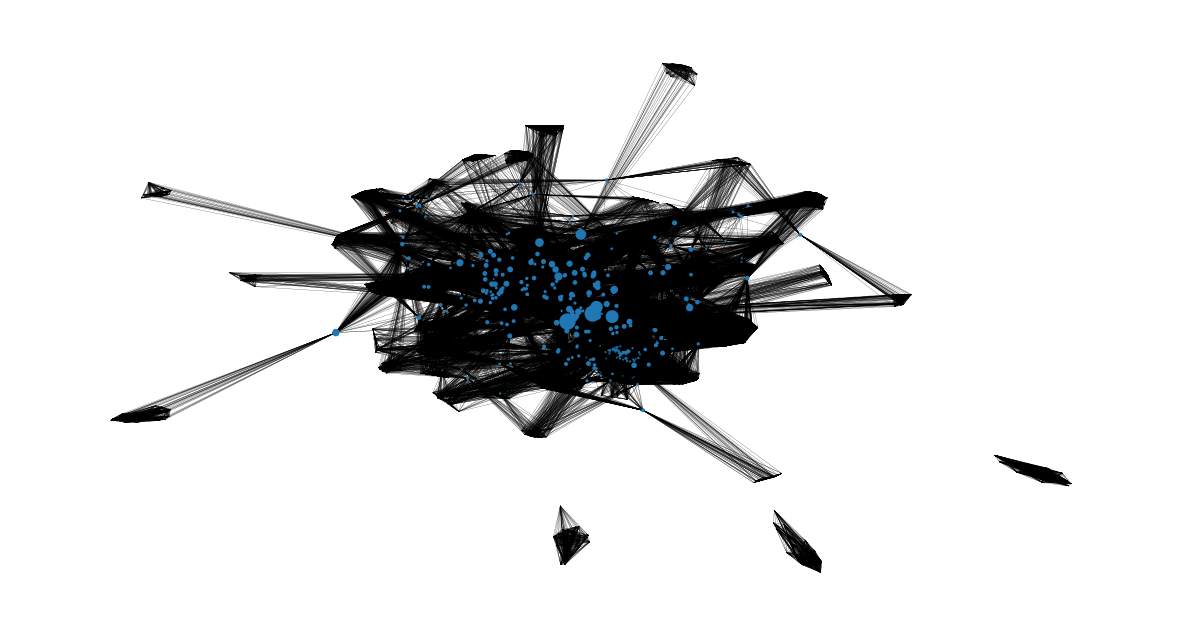

In [ ]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(user_graph, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [ ]:
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

# Create a DataFrame from the sorted betweenness centrality
df_betweenness = pd.DataFrame(sorted_betweenness, columns=['Node', 'Betweenness Centrality'])
print(df_betweenness)

                 Node  Betweenness Centrality
0     IndieMinimalist                0.097958
1           antogerva                0.095741
2           Sandalots                0.057765
3             orociic                0.053645
4          appfromape                0.049993
...               ...                     ...
4050           M450ud                0.000000
4051       mehranand1                0.000000
4052     erfantarighi                0.000000
4053           B4NDT0                0.000000
4054      Mehrshd3117                0.000000

[4055 rows x 2 columns]


Mean Betweenness Centrality: 0.0003016913583240975
Median Betweenness Centrality: 0.0
Standard Deviation: 0.002912048528051694


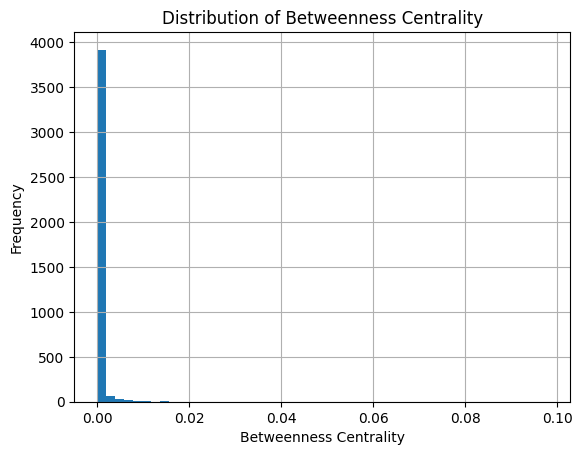

In [ ]:
mean_centrality = df_betweenness['Betweenness Centrality'].mean()
median_centrality = df_betweenness['Betweenness Centrality'].median()
std_centrality = df_betweenness['Betweenness Centrality'].std()

print(f"Mean Betweenness Centrality: {mean_centrality}")
print(f"Median Betweenness Centrality: {median_centrality}")
print(f"Standard Deviation: {std_centrality}")

df_betweenness['Betweenness Centrality'].hist(bins=50)
plt.title('Distribution of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()

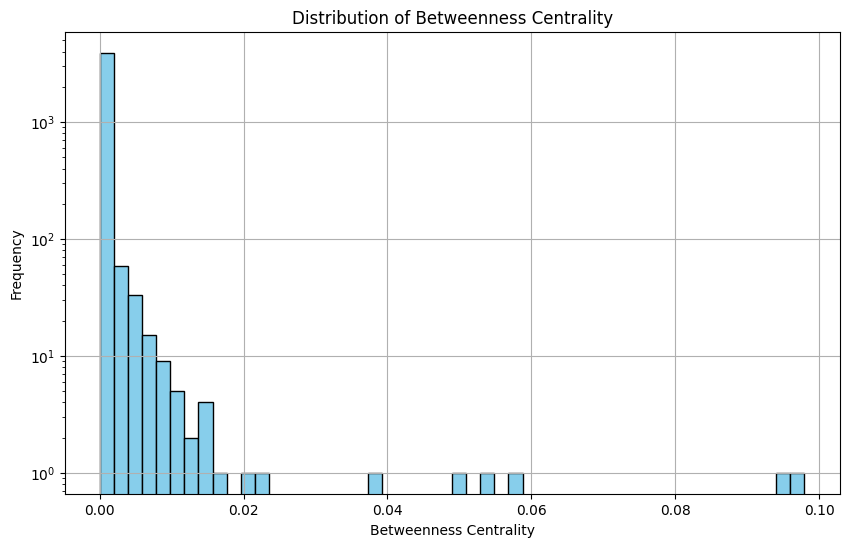

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_betweenness['Betweenness Centrality'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [ ]:
folder_path = '/content/drive/MyDrive/PMF 2 4/STROJNO + MREŽE/NEW/'

df_betweenness.to_csv(folder_path + 'new_betweenness.csv', index=False)
df_betweenness.to_json(folder_path + 'new_betweenness.json', orient='records', lines=True)

print("Files saved to Google Drive.")

Files saved to Google Drive.


#Community Detection

In [ ]:
import networkx as nx
from networkx.algorithms import community

In [ ]:
graph_file = 'github_stargazers_graph.graphml'
G = nx.read_graphml(graph_file)

graph = nx.Graph(G)

In [ ]:
communities_generator = community.greedy_modularity_communities(graph)

communities = list(communities_generator)

print(f"Number of communities detected: {len(communities)}")
for i, comm in enumerate(communities):
    print(f"Community {i + 1} has {len(comm)} members.")
    print(comm)

Number of communities detected: 17
Community 1 has 724 members.
frozenset({'0xChikDot', 'lnstchtped', 'AceSen', 'mickeyscorsese', 'MrPoou', 'ituises', 'Liky0310', 'jazzpiano3', 'wangchengao', 'xiaohuacc', 'bryanxtong', 'wujian0327', 'GloriaGordon1993', 'ronnyhaase', 'nick199910', 'furkan-ux', 'kien-rise', 'Bingmo33', 'WayneLiang', 'yash-atreya', 'ShoesRox-85', 'antogerva', 'IronnMan', 'lcfr-eth', 'JunaYa', 'Unlimitorbe80', 'InsideLifej', 'taeguk', 'KroolSpiceNogginne', 'profishional', 'gotounix', 'Opissroo-Glasedip', 'Tarunadityaselva', 'HunterSkunky-37', 'husky-wdy', 'dtwangquan', 'RestartFU', 'Rjected', 'zerosnacks', 'plumrains', '0xJackJun', 'Lekssays', 'dingdaoyi', 'SAMUSENPS', 'mindok7520', 'tangtang666', 'Aigcxc', 'arjstra', '0xtaos', 'ddb136183', 'KroolSpice3', 'Jackfasc-e', 'zofycasper', 'akionux', '915111502', 'temichelle13', 'StormDarth', 'yuankongzhe', 'Miyamura80', 'radking22', 'mrhaozi', 'maximebrugel', 'appfromape', 'mertwole', 'aa66609', 'Missingol-Promnica', 'little-zho

In [ ]:
color_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = i

node_colors = [color_map[node] for node in graph.nodes]

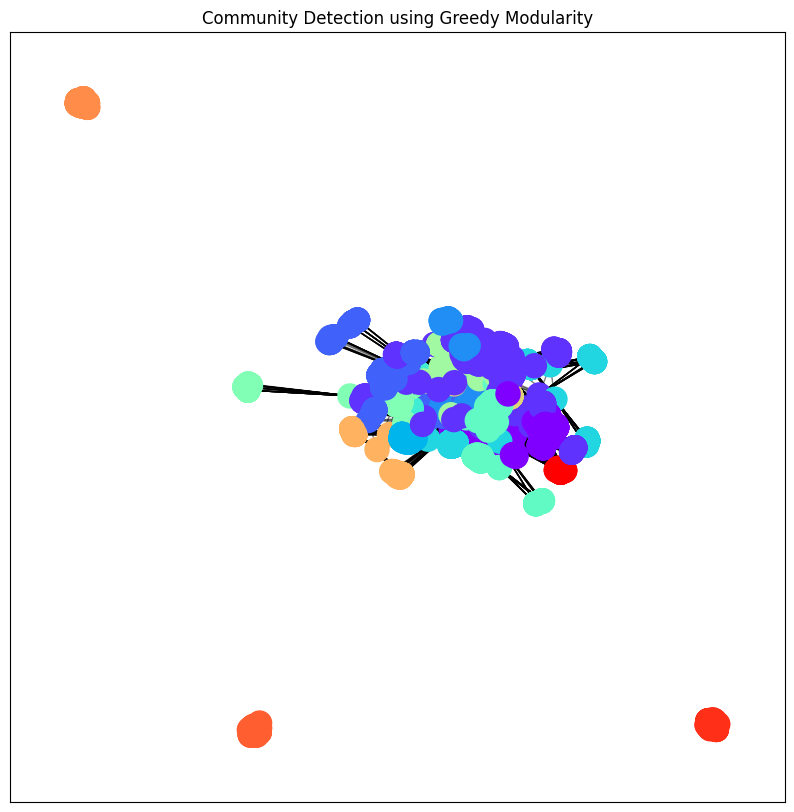

In [ ]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos, node_color=node_colors, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(graph, pos, alpha=0.5)

plt.title("Community Detection using Greedy Modularity")
plt.show()

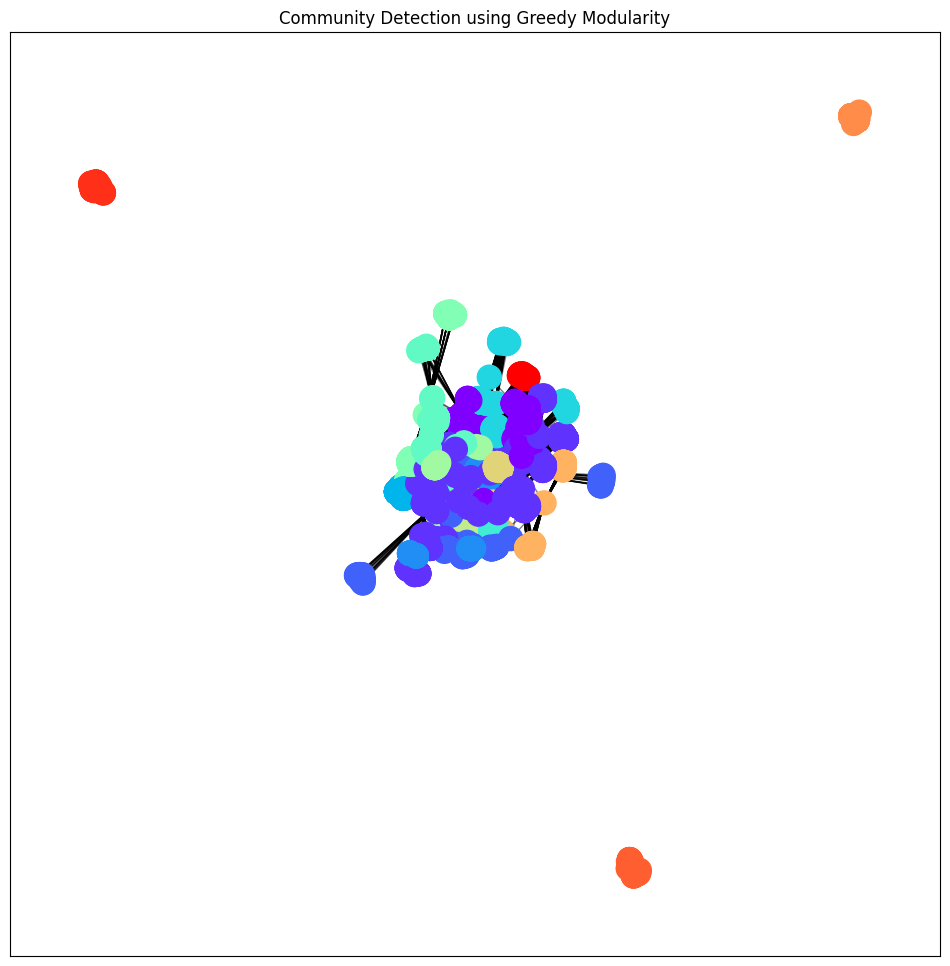

In [ ]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos, node_color=node_colors, cmap=plt.cm.rainbow, node_size=300)
nx.draw_networkx_edges(graph, pos, alpha=0.5)

plt.title("Community Detection using Greedy Modularity")
plt.show()